In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

# Unsupervised

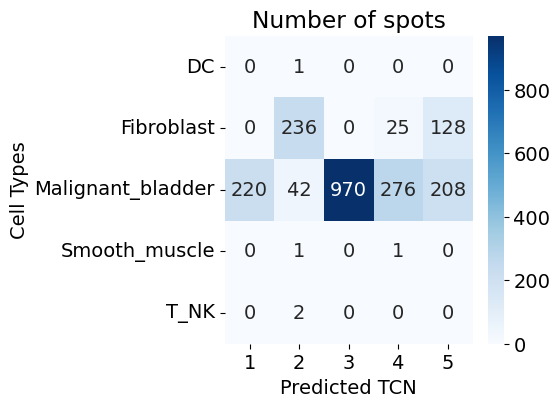

In [82]:
ImageName = "CH_B_010a_vis"
timestamp = "2024-11-14_15-45-02"

fpath = f"/home/owkin/project/cytocommunity_results/dominant_cell_type/experiments/{ImageName}/{timestamp}/ensemble/TCNLabel_MajorityVoting.csv"
df = pd.read_csv(fpath, header=None)
df.rename(columns={0: "Predicted TCN"}, inplace=True)

fpath = f"/home/owkin/project/cytocommunity_results/dominant_cell_type/raw/{ImageName}_CellTypeLabel.txt"
celltypes = pd.read_csv(fpath, header=None)
df["celltypes"] = celltypes

grouped = df.groupby(["celltypes", "Predicted TCN"]).size().reset_index(name="count")

# Step 2: Pivot the table
heatmap_data = grouped.pivot(index="celltypes", columns="Predicted TCN", values="count").fillna(0)

# Step 3: Create the heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap="Blues", cbar=True)
plt.title("Number of spots")
plt.ylabel("Cell Types")
plt.xlabel("Predicted TCN")
plt.show()


# Supervised

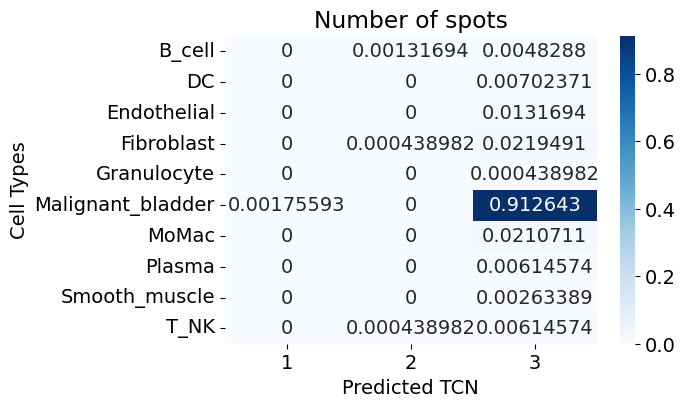

,celltypes,Predicted TCN,count,frequency
0,B_cell,2,3,0.001317
1,B_cell,3,11,0.004829
2,DC,3,16,0.007024
3,Endothelial,3,30,0.013169
4,Fibroblast,2,1,0.000439
5,Fibroblast,3,50,0.021949
6,Granulocyte,3,1,0.000439
7,Malignant_bladder,1,4,0.001756
8,Malignant_bladder,3,2079,0.912643
9,MoMac,3,48,0.021071


In [98]:
# Sample level

ImageName = "CH_B_004b_vbu"
#ImageName = "CH_B_006b_vis"
#ImageName = "CH_B_010a_vis"
timestamp = "2024-11-15_13-16-19"

fpath = f"/home/owkin/project/cytocommunity_results/dominant_cell_type/supervised/experiments/{timestamp}/ensemble/ImageCollection/{ImageName}/TCNLabel_MajorityVoting.csv"
df = pd.read_csv(fpath, header=None)
df.rename(columns={0: "Predicted TCN"}, inplace=True)

fpath = f"/home/owkin/project/cytocommunity_results/dominant_cell_type/raw/{ImageName}_CellTypeLabel.txt"
celltypes = pd.read_csv(fpath, header=None)
df["celltypes"] = celltypes

grouped = df.groupby(["celltypes", "Predicted TCN"]).size().reset_index(name="count")
grouped["frequency"] = grouped["count"] / grouped["count"].sum()

# Step 2: Pivot the table
heatmap_data = grouped.pivot(index="celltypes", columns="Predicted TCN", values="frequency").fillna(0)

# Step 3: Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap="Blues", cbar=True)
plt.title("Number of spots")
plt.ylabel("Cell Types")
plt.xlabel("Predicted TCN")
plt.show()

grouped["frequency"].sum()
grouped

['CH_B_004b_vbu', 'CH_B_006b_vis', 'CH_B_010a_vis', 'CH_B_013a_vis', 'CH_B_016a_vis', 'CH_B_019a_vis', 'CH_B_020a_vis', 'CH_B_022a_vis', 'CH_B_023a_vis', 'CH_B_025a_vis', 'CH_B_027a_vis', 'CH_B_029a_vis', 'CH_B_031a_vis', 'CH_B_044a_vbu', 'CH_B_045a_vis', 'CH_B_047a_vbu', 'CH_B_050a_vis', 'CH_B_052a_vis', 'CH_B_053a_vbu', 'CH_B_054a_vbu', 'CH_B_055a_vis', 'CH_B_056a_vis', 'CH_B_071a_vis', 'CH_B_072a_vis', 'CH_B_080a_vis', 'CH_B_081a_vis', 'CH_B_084a_vis', 'CH_B_086a_vis', 'CH_B_088a_vis', 'CH_B_090a_vis', 'CH_B_093a_vis', 'CH_B_095a_vis', 'CH_B_096a_vis']


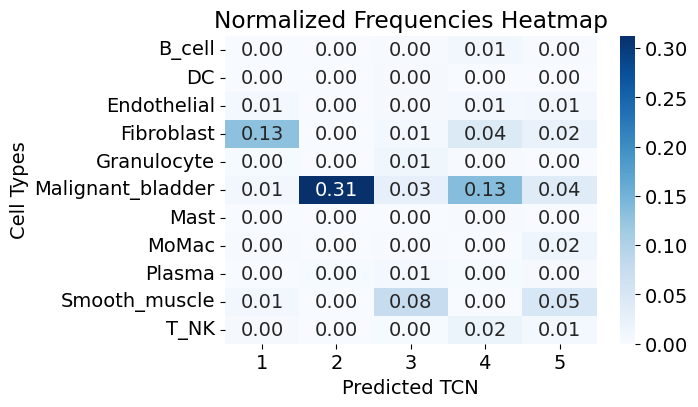

celltypes               B_cellB_cellB_cellB_cellB_cellDCDCDCDCEndothel...
Predicted TCN                                                         163
average_frequency                                                     1.0
normalized_frequency                                                  1.0
dtype: object

In [104]:
# Cohort level
#ImageNameAll = ["CH_B_004b_vbu", "CH_B_006b_vis", "CH_B_010a_vis"]

file_path = "/home/owkin/mibc/supervised/chuv/ImageNameList.txt"
# Open and read the file into a list
with open(file_path, "r") as file:
    ImageNameAll = [line.strip() for line in file]  # Remove trailing newlines/whitespaces


# Print the content
print(ImageNameAll)


timestamp = "2024-11-15_14-03-36"

grouped_all = []

for ImageName in ImageNameAll:
    # Load the data
    fpath = f"/home/owkin/project/cytocommunity_results/dominant_cell_type/supervised/experiments/{timestamp}/ensemble/ImageCollection/{ImageName}/TCNLabel_MajorityVoting.csv"
    df = pd.read_csv(fpath, header=None)
    df.rename(columns={0: "Predicted TCN"}, inplace=True)
    
    fpath = f"/home/owkin/project/cytocommunity_results/dominant_cell_type/raw/{ImageName}_CellTypeLabel.txt"
    celltypes = pd.read_csv(fpath, header=None)
    df["celltypes"] = celltypes

    # Group by celltypes and Predicted TCN
    grouped = df.groupby(["celltypes", "Predicted TCN"]).size().reset_index(name="count")
    grouped["frequency"] = grouped["count"] / grouped["count"].sum()
    grouped_all.append(grouped)

# Get the union of all (celltypes, Predicted TCN) pairs
all_combinations = pd.concat(grouped_all)[["celltypes", "Predicted TCN"]].drop_duplicates()

# Ensure all combinations are present in each dataframe
grouped_all_padded = []
for grouped in grouped_all:
    grouped_padded = all_combinations.merge(grouped, on=["celltypes", "Predicted TCN"], how="left").fillna(0)
    grouped_padded["frequency"] = grouped_padded["frequency"].fillna(0)
    grouped_all_padded.append(grouped_padded)

# Concatenate padded dataframes
grouped_concat = pd.concat(grouped_all_padded)

# Compute average frequencies across all images
grouped_final = (
    grouped_concat.groupby(["celltypes", "Predicted TCN"])["frequency"]
    .mean()
    .reset_index(name="average_frequency")
)

# Normalize the frequencies so they sum up to 1
total_frequency = grouped_final["average_frequency"].sum()
grouped_final["normalized_frequency"] = grouped_final["average_frequency"] / total_frequency

# Step 2: Pivot the table
heatmap_data = grouped_final.pivot(index="celltypes", columns="Predicted TCN", values="normalized_frequency").fillna(0)

# Step 3: Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Normalized Frequencies Heatmap")
plt.ylabel("Cell Types")
plt.xlabel("Predicted TCN")
plt.show()

grouped_final.sum()

In [100]:
grouped_final["average_frequency"].sum()

1.0

In [102]:
ImageNameAll

'CH_B_004b_vbu\nCH_B_006b_vis\nCH_B_010a_vis\nCH_B_013a_vis\nCH_B_016a_vis\nCH_B_019a_vis\nCH_B_020a_vis\nCH_B_022a_vis\nCH_B_023a_vis\nCH_B_025a_vis\nCH_B_027a_vis\nCH_B_029a_vis\nCH_B_031a_vis\nCH_B_044a_vbu\nCH_B_045a_vis\nCH_B_047a_vbu\nCH_B_050a_vis\nCH_B_052a_vis\nCH_B_053a_vbu\nCH_B_054a_vbu\nCH_B_055a_vis\nCH_B_056a_vis\nCH_B_071a_vis\nCH_B_072a_vis\nCH_B_080a_vis\nCH_B_081a_vis\nCH_B_084a_vis\nCH_B_086a_vis\nCH_B_088a_vis\nCH_B_090a_vis\nCH_B_093a_vis\nCH_B_095a_vis\nCH_B_096a_vis\n'

In [110]:
import os
filenames = os.listdir("/home/owkin/project/cytocommunity_results/fractions/supervised/experiments/2024-11-19_10-08-28/ensemble/ImageCollection")
len(filenames)

33